In [5]:
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates 

%matplotlib inline
plt.style.use('fivethirtyeight')
 
df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv', parse_dates=['Date'])
df['Total Cases'] = df[['Confirmed','Recovered','Deaths']].sum(axis=1)
df.head()   
    

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0


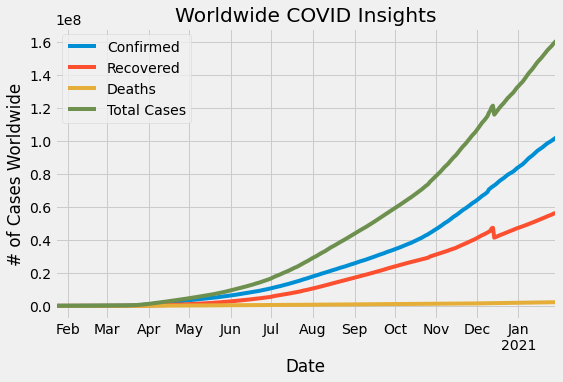

In [10]:
# Worldwide Cases 

worldwide_df = df.groupby(['Date']).sum() #Get all the dates
w = worldwide_df.plot(figsize=(8,5))
w.set_xlabel('Date')
w.set_ylabel('# of Cases Worldwide')
w.title.set_text('Worldwide COVID Insights')

df.head()
plt.show()

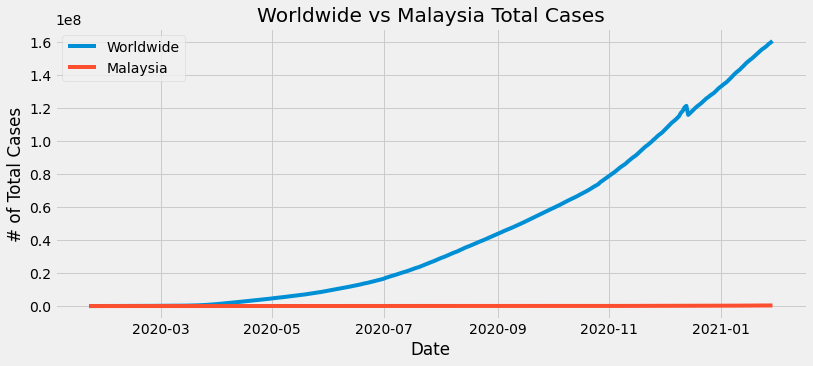

In [55]:
m_df = df[df['Country']=='Malaysia'].groupby(['Date']).sum() #Gives you all the rows such that the country is US

m_df

fig = plt.figure(figsize=(12,5)) #size of the grid
ax = fig.add_subplot(111) #add_subplot (1x1 grid 1st subplot)

ax.set_xlabel('Date')
ax.set_ylabel('# of Total Cases')
ax.title.set_text('Worldwide vs Malaysia Total Cases')

ax.plot(worldwide_df[['Total Cases']], label = 'Worldwide')
ax.plot(m_df[['Total Cases']], label = 'Malaysia')

plt.legend(loc="upper left")
plt.show()


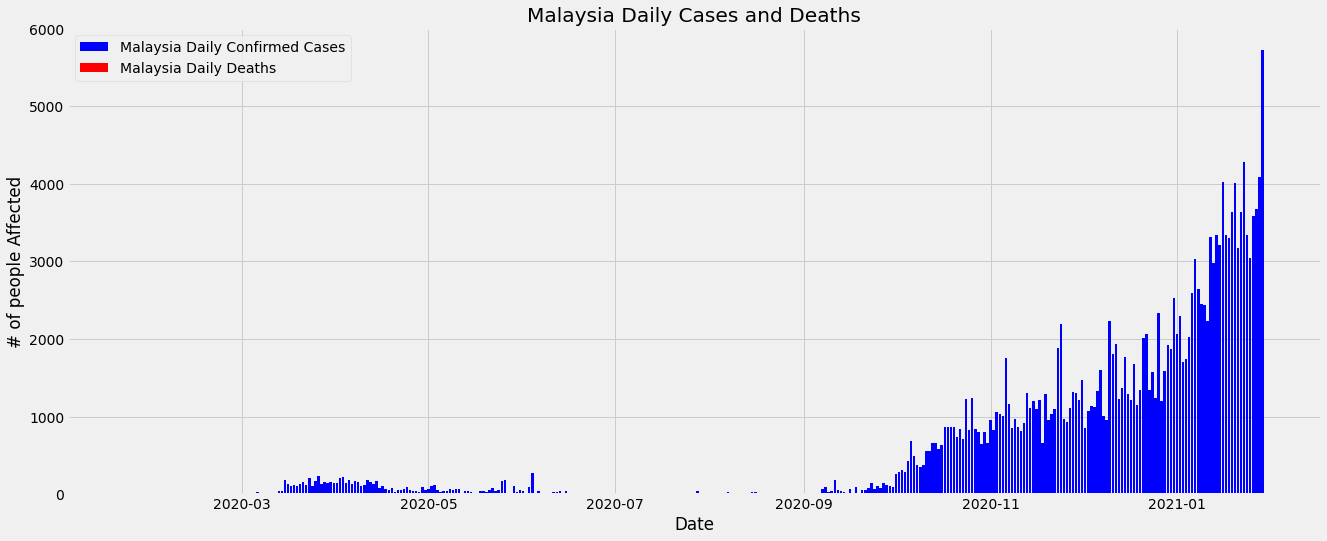

In [53]:
#united States daily cases and deaths 

m_df = m_df.reset_index() # Reset the index of the data frame 
#Daily confirmed is Confirmed - Confirmed shift down (day before) 
m_df['Daily Confirmed'] = m_df['Confirmed'].sub(m_df['Confirmed'].shift())
m_df['Daily Deaths'] = m_df['Deaths'].sub(m_df['Deaths'].shift())

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)

ax.bar(m_df['Date'],m_df['Daily Confirmed'],color ='b', label = 'Malaysia Daily Confirmed Cases')
ax.bar(m_df['Date'],m_df['Daily Deaths'], color='r', label='Malaysia Daily Deaths')
ax.set_xlabel('Date')
ax.set_ylabel('# of people Affected')
ax.title.set_text('Malaysia Daily Cases and Deaths')

ax.legend(loc='upper left')

plt.show()


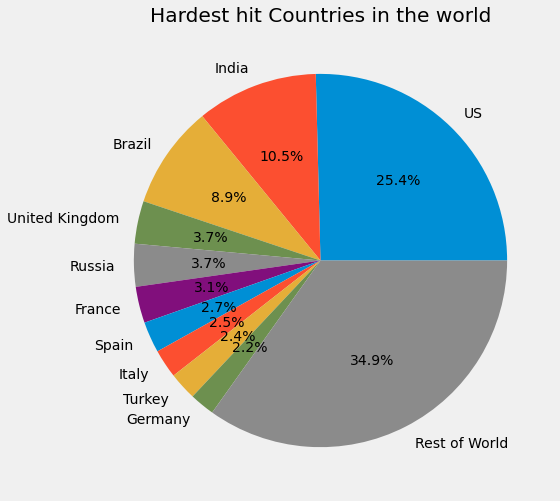

In [108]:
from datetime import date, timedelta 
yesterday = date.today() - timedelta(days=1)
yesterday.strftime('%Y-%m-%d')
today_df = df[df['Date']==str(yesterday)] #Get most recent timeframe of the data
top_10 = today_df.sort_values(['Confirmed'], ascending=False)[:10]
top_10.loc['rest-of-world'] = today_df.sort_values(['Confirmed'], ascending=False)[10:].sum()
top_10.loc['rest-of-world','Country'] = 'Rest of World'
top_10

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.title.set_text('Hardest hit Countries in the world')
ax.pie(top_10['Confirmed'], labels=top_10['Country'], autopct='%1.1f%%')
plt.show()
